### Tree Models

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression, make_classification

In [4]:
X, y = make_regression(n_samples = 5, n_features = 1)

In [5]:
X

array([[ 1.04742539],
       [ 1.5037919 ],
       [-1.06518626],
       [-0.70775811],
       [-0.66776176]])

In [6]:
pd.DataFrame({'X': X[:, 0], 'y': y})

,X,y
0,1.047425,96.405907
1,1.503792,138.410262
2,-1.065186,-98.040633
3,-0.707758,-65.142647
4,-0.667762,-61.461350


In [18]:
import seaborn as sns

In [19]:
titanic = sns.load_dataset('titanic')

In [20]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [24]:
X = titanic.drop('survived', axis = 1)
y = titanic.survived

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(3), object(5)
memory usage: 73.7+ KB


In [28]:
X.drop(['alive', 'embark_town', 'who'], axis = 1, inplace = True)

In [30]:
X = pd.get_dummies(X, drop_first=True)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
pclass          891 non-null int64
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
adult_male      891 non-null bool
alone           891 non-null bool
sex_male        891 non-null uint8
embarked_Q      891 non-null uint8
embarked_S      891 non-null uint8
class_Second    891 non-null uint8
class_Third     891 non-null uint8
deck_B          891 non-null uint8
deck_C          891 non-null uint8
deck_D          891 non-null uint8
deck_E          891 non-null uint8
deck_F          891 non-null uint8
deck_G          891 non-null uint8
dtypes: bool(2), float64(2), int64(3), uint8(11)
memory usage: 46.2 KB


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
dtree = DecisionTreeClassifier()

In [35]:
from sklearn.impute import KNNImputer

In [37]:
# dtree.fit(X_train, y_train)
pipe = Pipeline([('impute', KNNImputer()), ('dtree', DecisionTreeClassifier())])

In [38]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('impute', KNNImputer()), ('dtree', DecisionTreeClassifier())])

In [39]:
pipe.score(X_test, y_test)

0.7757847533632287

In [40]:
pipe.score(X_train, y_train)

0.9895209580838323

In [41]:
params = {'dtree__max_depth': [None, 4, 5, 10], 
         'dtree__criterion': ['gini', 'entropy']}

In [42]:
grid = GridSearchCV(pipe, param_grid=params)

In [43]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('impute', KNNImputer()),
                                       ('dtree', DecisionTreeClassifier())]),
             param_grid={'dtree__criterion': ['gini', 'entropy'],
                         'dtree__max_depth': [None, 4, 5, 10]})

In [44]:
grid.score(X_test, y_test)

0.8071748878923767

In [45]:
grid.score(X_train, y_train)

0.8458083832335329

In [61]:
grid.best_params_

{'dtree__criterion': 'entropy', 'dtree__max_depth': 4}

In [62]:
est = grid.best_estimator_

In [ ]:
est.

In [46]:
from sklearn.metrics import classification_report, roc_curve

In [47]:
print(classification_report(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       127
           1       0.82      0.71      0.76        96

    accuracy                           0.81       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.81      0.80       223



In [50]:
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:, 1])

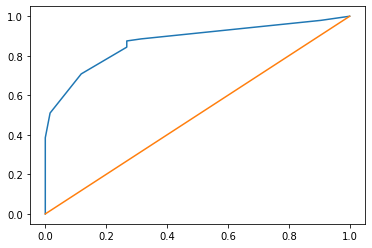

In [52]:
plt.plot(fpr, tpr)
plt.plot(tpr, tpr)

In [53]:
from sklearn.metrics import precision_recall_curve

In [59]:
pr, recall, thresh = precision_recall_curve(y_train, grid.predict_proba(X_train)[:, 1])

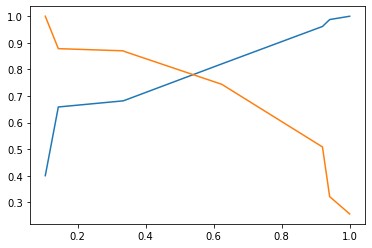

In [60]:
plt.plot(thresh, pr[:-1])
plt.plot(thresh, recall[:-1])

In [67]:
pd.DataFrame({'features': X_train.columns, 'import': est.named_steps['dtree'].feature_importances_}).sort_values(ascending = False, by = 'import')

,features,import
5,adult_male,0.527891
0,pclass,0.200473
4,fare,0.193774
1,age,0.027830
10,class_Second,0.017086
3,parch,0.013708
15,deck_E,0.011218
13,deck_C,0.008019
12,deck_B,0.000000
16,deck_F,0.000000


In [69]:
from sklearn.tree import plot_tree

In [70]:
tree = est.named_steps['dtree']

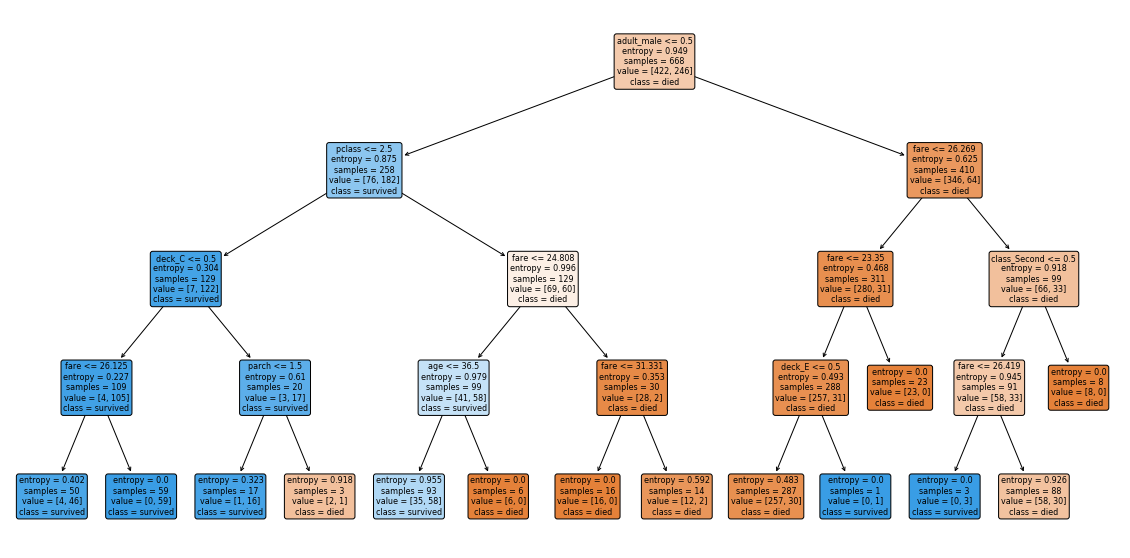

In [98]:
plt.figure(figsize = (20, 10))
plot_tree(tree,  
                     feature_names=X.columns,  
                     class_names=['died', 'survived'],  
                     filled=True, rounded=True,  
                     );
plt.savefig('dtree.png', dpi = 400)

In [75]:
import graphviz 
from sklearn.tree import export_graphviz

In [87]:
dot_data = export_graphviz(tree, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['died', 'survived'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data, format = 'png')  


In [88]:
from IPython.display import Image

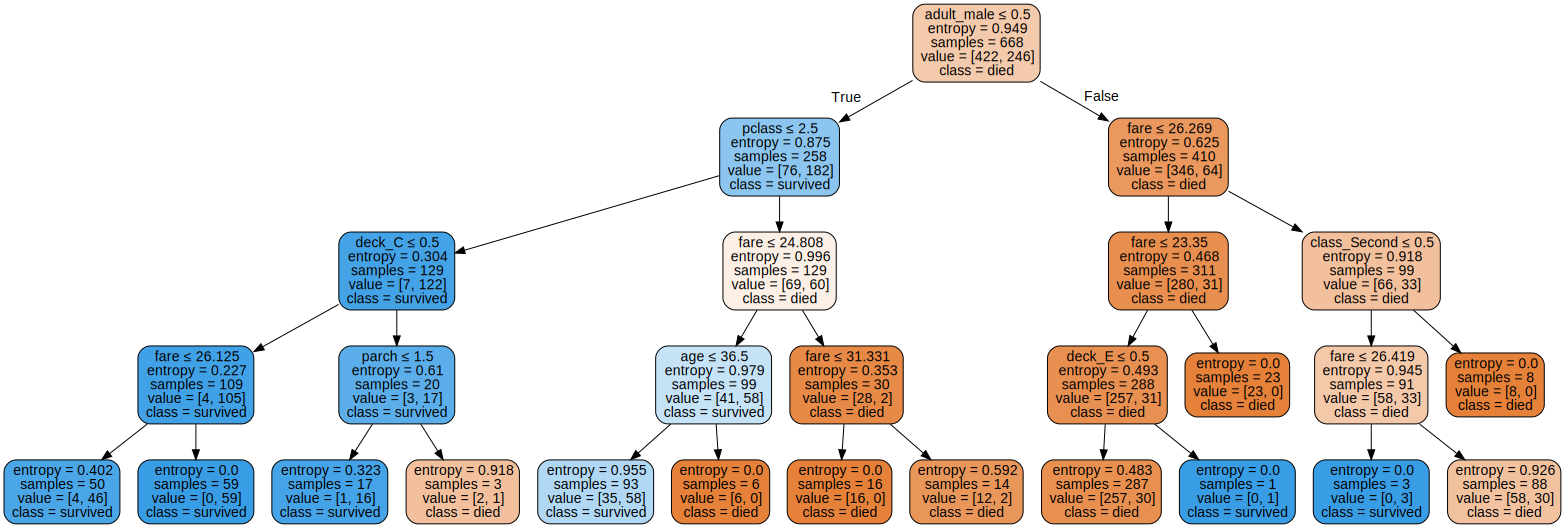

In [90]:
graph

In [103]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(est, X_train, y_train,
                target_name="target",
                feature_names=X.columns,
                class_names=['die', 'survive'])

viz

AttributeError: 'NoneType' object has no attribute 'nclasses'

In [83]:
type(graph)

graphviz.files.Source

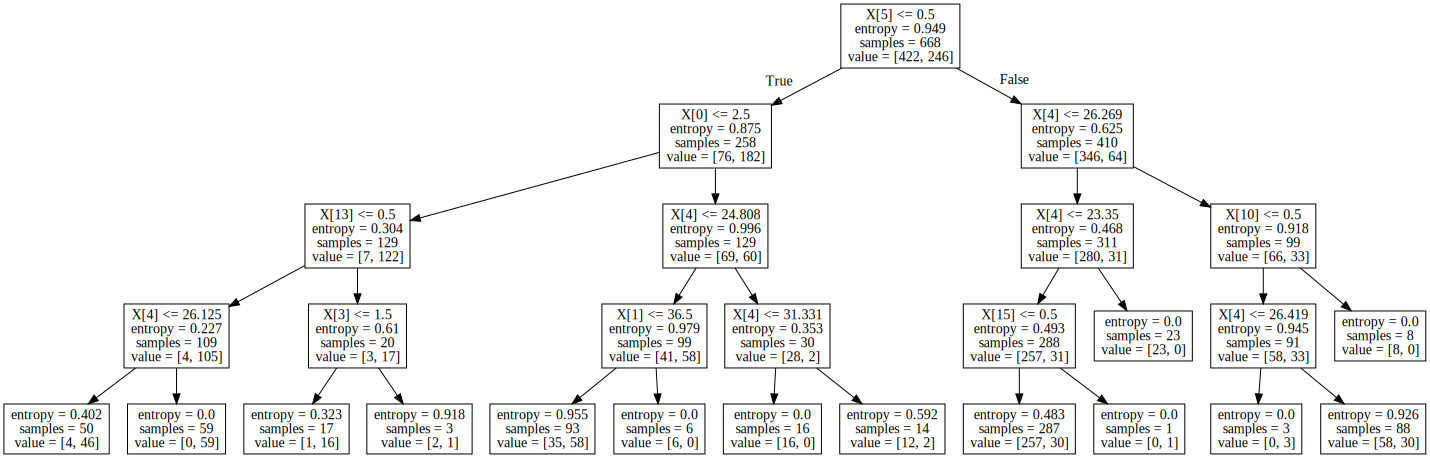

In [78]:
graph

In [13]:
ex2 = {'deadline': ['urgent', 'urgent', 'near', 'none', 'none', 'none', 'near', 'near', 'near',  'urgent'],
      'party': ['y', 'n', 'y', 'y', 'n', 'y', 'n', 'n', 'y', 'n'],
      'lazy': ['y', 'n', 'y', 'y', 'n', 'y', 'n', 'n', 'y', 'y', 'n'],
      'activity': ['party', 'study', 'party', 'party', 'pub', 'party', 'study', 'tv', 'party', 'study']}

In [14]:
pd.DataFrame(ex2)

ValueError: arrays must all be same length